In [1]:
# Constants
mz0 = 91.1880 * 10**9 #eV/c^2
err_mz0 = 0.0020 * 10**9 #eV/c^2
mw = 80.3692 * 10**9 #eV/c^2
err_mw = 0.0133 * 10**9 #eV/c^2
mH = 125.20 * 10**9 #eV/c^2
err_mH = 0.11 * 10**9 #eV/c^2
me = 0.51099895000 * 10**6 #eV/c^2
err_me = .00015 #eV/c^2
mU = 105.6583755 * 10**6 #eV/c^2
err_mU = .0000023 *10**6 #eV/c^2
mT = 1776.93 * 10**6 #eV/c^2
err_mT = 0.09 * 10**6 #eV/c^2

#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as st

### Part 1: The Invariant Mass Distribution

In [2]:
Adata = pd.read_csv('atlas_z_to_ll.csv')
#importing data using pandas (its prettier)
Adata

,pt1,pt2,eta1,eta2,phi1,phi2,E1,E2
0,33.144898,21.067385,2.176089,-0.139190,0.214251,-2.670418,147.913470,21.271793
1,42.871246,37.205387,0.067116,-0.946074,-0.132653,-2.926308,42.967840,55.135395
2,33.070188,29.222084,-0.366347,-2.146044,2.462502,-0.861610,35.314297,126.647130
3,28.597910,19.120684,1.951096,2.089655,-1.353901,1.913332,102.645260,78.450766
4,49.459629,35.819855,-1.319296,-0.482460,1.621212,-1.404498,99.119836,40.070199
...,...,...,...,...,...,...,...,...
4995,29.930059,29.381160,2.256520,1.729402,-0.863087,2.447245,144.480060,85.420945
4996,29.730148,7.673824,0.152532,1.537026,2.873968,2.457679,30.076670,18.669490
4997,64.161180,21.142514,-0.905161,-2.212339,-0.260093,2.632303,92.289664,97.747172
4998,40.850000,21.581859,0.596933,1.628593,-1.354698,1.697400,48.346836,57.115437


Text(0, 0.5, 'Count')

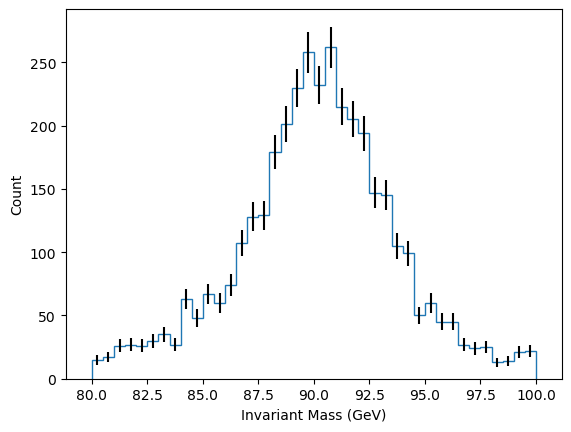

In [3]:
px = Adata['pt1']*np.cos(Adata['phi1']) + Adata['pt2']*np.cos(Adata['phi2']) 
py = Adata['pt1']*np.sin(Adata['phi1']) + Adata['pt2']*np.sin(Adata['phi2'])
pz = Adata['pt1']*np.sinh(Adata['eta1']) + Adata['pt2']*np.sinh(Adata['eta2'])
E = Adata['E1'] + Adata['E2']
#getting the vector addition of each component

M = np.sqrt(E**2 - (px**2 + py**2 + pz**2))
#finding invariant mass using given function

bins1 = np.linspace(80, 100, 41)

fig1, ax1 = plt.subplots()

histdata = ax1.hist(M, bins = bins1, histtype = 'step')
#collecting the histogram data (the height of the bins and the edges of the bins)
N = histdata[0] #the height of the bins (count) 
binedges = histdata[1]
#separating out the data

bincenter = 0.5*(binedges[1:] + binedges[:-1]) #the centers of the bins (this is mass)
#since the histdata only gives the edges, we have to calculate the centers so
# the errorbars are centered

ax1.bar(bincenter, N, color = 'white', yerr = np.sqrt(N))
#using a bar graph set to white so the bars dont appear, just the errors
ax1.set_xlabel('Invariant Mass (GeV)')
ax1.set_ylabel('Count')



### Part 2: Breit-Wigner Fit

Chi-squared: 9.985097164263708
Reduced Chi-squared: 0.9985097164263708
P-value: 0.441801738562729
m0 = 90.34080586028303 +- 0.008745022883629956 GeV


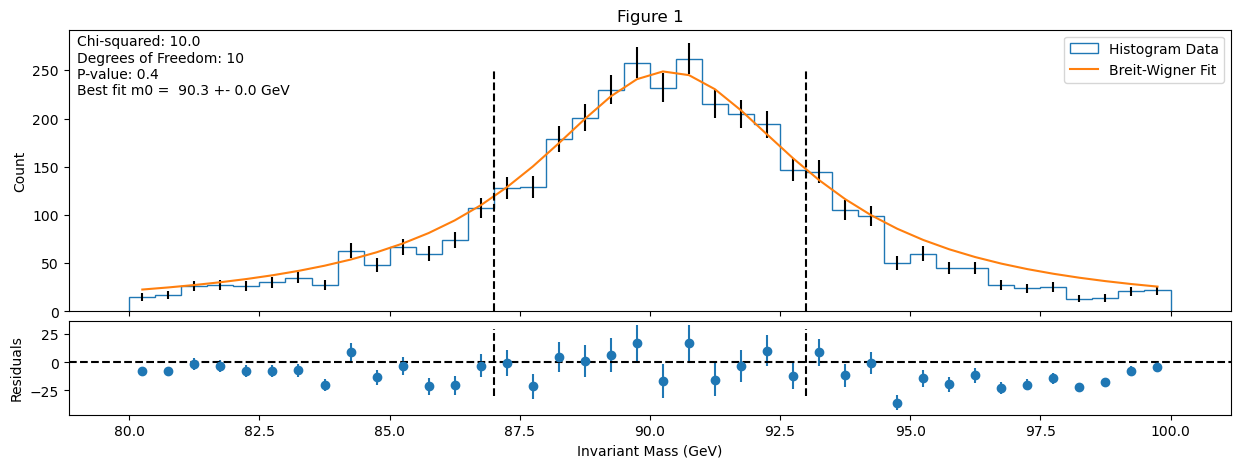

In [11]:
def Decay(m, m0, T): 
    denom = np.pi*((m-m0)**2+(T/2)**2)
    num = 2500*T/2
    return num/denom
#defining the decay function (takes masses, returns probability)

mask1 = (bincenter > 87) & (bincenter < 93)

newN = N[mask1]
new_bins = bincenter[mask1]
#masking over the arrays we already have

params, covar = curve_fit( f = Decay, xdata = new_bins, ydata = newN, 
                          sigma = np.sqrt(newN), absolute_sigma = True)
fitm0 = params[0]
fitT = params[1] 
#doing a curve fit using new_bins (mass) as the xdata, and N (probability/count
# of instances as the ydata

D = Decay(new_bins, fitm0, fitT)
#get residuals for data we dont have a fit for

resid = newN - D
fig, (ax2, ax2r) = plt.subplots(
    2, 1, sharex = True, figsize=(15,5), 
    gridspec_kw = {'height_ratios': [3, 1], 'hspace' : 0.05})

Dall = Decay(bincenter, fitm0, fitT)
residall = N - Dall

ax2.hist(M, bins = bins1, histtype = 'step', label = 'Histogram Data')
ax2.bar(bincenter, N, color = 'white', yerr = np.sqrt(N))
ax2.plot(bincenter, Dall, label = 'Breit-Wigner Fit')
ax2.vlines(87, 0, 250, ls = '--', color = 'k')
ax2.vlines(93, 0, 250, ls = '--', color = 'k')
#plotting on the upper graph

ax2r.errorbar(bincenter, residall, yerr = np.sqrt(N), fmt = 'o')
ax2r.axhline(0, ls = '--', color = 'k')
ax2r.vlines(87, -30, 30, ls = '--', color = 'k')
ax2r.vlines(93, -30, 30, ls = '--', color = 'k')
#plotting on the lower graph

ax2r.set_xlabel('Invariant Mass (GeV)')
ax2.set_ylabel('Count')
ax2r.set_ylabel('Residuals')
ax2.legend()
ax2.set_title('Figure 1')
#making the plot pretty

### chi-square, reduced chi-sq, p-value

chisq = ((resid/np.sqrt(newN))**2).sum()
ddof = len(D) -2
#finding number of unmasked entries (number of comparisons) minus fitting
# parameters (2) to find ddof
redchisq = chisq/ddof
pval = st.chi2.sf(chisq, ddof)
print(f"Chi-squared: {chisq}\nReduced Chi-squared: {redchisq}\nP-value: {pval}")
print(f"m0 = {params[0]} +- {covar[0][0]} GeV")
#printing out values
ax2.text(79,225, f"Chi-squared: {chisq:.1f}\nDegrees of Freedom: {ddof}\nP-value: {pval:.1f}\nBest fit m0 =  {params[0]:.1f} +- {covar[0][0]:.1f} GeV");

plt.savefig('Figure1')

### Part 3: Parameter Columns

In [5]:
m0s = np.linspace(89, 91, 300)
Ts = np.linspace(5,8,300)
chisqs = np.zeros((300,300))
#def the scanning range, and the output array

for i in range(len(m0s)):
    for j in range(len(Ts)):
        Dt = Decay(new_bins, m0s[i], Ts[j])
        chisqt = (((newN - Dt)/np.sqrt(newN))**2).sum()
        chisqs[i,j] = chisqt



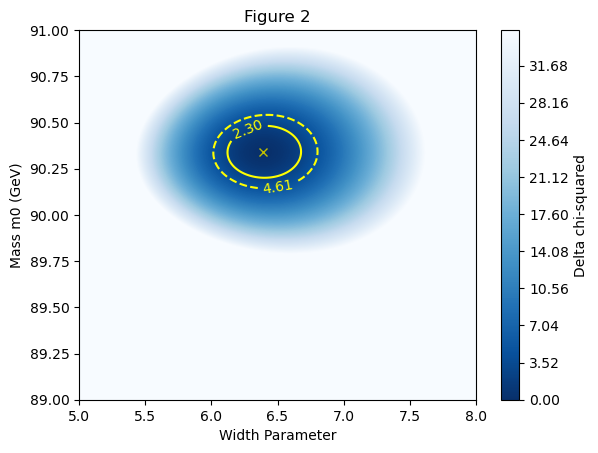

In [6]:
XX, YY = np.meshgrid(Ts,m0s)

chimin = np.min(chisqs)
chimap = np.clip(chisqs, chimin, chimin+35)
dchimap = chimap-chimin
#making the delta chi-squared table

fig3, ax3 = plt.subplots()
colors = ax3.contourf(XX, YY, dchimap, 500, cmap = 'Blues_r')
cbar = fig3.colorbar(colors)

ax3.set_xlabel("Width Parameter")
ax3.set_ylabel("Mass m0 (GeV)")
cbar.set_label("Delta chi-squared")
#adding labels

levels = [2.3, 4.61] #levels determined by the number of free variables there
# are
cs = ax3.contour(XX,YY,dchimap, levels = levels, colors = ["yellow","yellow"],
                 linestyles = ['solid', 'dashed'])
ax3.clabel(cs, levels)
#adding contour and labels
ax3.set_title('Figure 2')
ax3.plot(fitT, fitm0, 'xy')

plt.savefig('Figure2')
